# 🐍🐼 Iterate with Style: Apply Conditional Logic with np.select and loc Together

### ❓ How would you classify customers based on multiple criteria like age and income?
🔧 Answer: Use `np.select` combined with `loc` to create complex classifications—all in one line. This technique keeps your code efficient and professional.

### 🔎 Why does it matter?
💡 Accurate data classification is essential in marketing campaigns, customer segmentation, and predictive models. This Python combo simplifies the process and minimizes errors.

### ✨ Real-World Case:
In this example, we categorize customers based on their age group and income using the `titanic` dataset from seaborn. Categories include:
- 👶 "Young - Low Income": Under 18 with low income.
- 👩‍💼 "Adult - Medium Income": Aged 18 to 50 with medium income.
- 👴 "Senior - High Income": Over 50 with high income.

### ⚙️ Business Impact:
🛍️ Implementing these segmentations can:
- Optimize ad campaigns for target audiences.
- Enhance personalization in e-commerce platforms.
- Maximize ROI by focusing resources strategically.

### 📊 Code Summary:
- Use `np.select` for multiple criteria.
- Apply conditions to the DataFrame with `loc`.
- Visualize results with a categorical plot for better insights.

### 💭 Reflection:
Efficient data management turns raw information into actionable insights. How would you apply this technique in your projects?

🌍✨ **#pandas #python #datascience #machinelearning #AI #datavisualization #technologyhashtag**

🔗 [Code on GitHub](https://github.com/jcombari/PyForAll)

---

# 🐍🐼 Itera con estilo: aplica lógica condicional con np.select y loc juntos

### ❓ ¿Cómo clasificarías a tus clientes basándote en múltiples criterios como edad e ingresos?
🔧 Respuesta: Usa `np.select` combinado con `loc` para crear clasificaciones complejas, todo en una sola línea. Esta técnica no solo es eficiente, sino que también mantiene tu código limpio y profesional.

### 🔎 ¿Por qué importa?
💡 Clasificar datos de manera precisa es clave en campañas de marketing, segmentación de clientes y modelos predictivos. Combinar estas herramientas de Python optimiza el proceso y minimiza errores.

### ✨ Caso práctico real:
En este ejemplo, categorizamos clientes según su grupo de edad e ingresos usando el dataset `titanic` incluido en seaborn. Asignaremos tres categorías basadas en:
- 👶 "Joven - Ingreso Bajo": Menores de 18 años con ingresos bajos.
- 👩‍💼 "Adulto - Ingreso Medio": Entre 18 y 50 años con ingresos medios.
- 👴 "Senior - Ingreso Alto": Mayores de 50 años con ingresos altos.

### ⚙️ Impacto en el negocio:
🛍️ Implementar estas segmentaciones puede ayudar a:
- Optimizar campañas publicitarias según el público objetivo.
- Mejorar la personalización en plataformas de e-commerce.
- Maximizar el retorno de inversión al focalizar recursos estratégicamente.

### 📊 Resumen del código:
- Se usa `np.select` para manejar múltiples criterios.
- Con `loc`, aplicamos estos criterios directamente en el DataFrame.
- Visualizamos el resultado con un gráfico categórico para interpretar los datos.

### 💭 Reflexión:
El manejo eficiente de datos nos permite convertir información cruda en conocimiento accionable. ¿Cómo utilizarías esta técnica en tus proyectos?

🌍✨ **#pandas #python #datascience #machinelearning #AI #datavisualization #technologyhashtag**

🔗 [Código en GitHub](https://github.com/jcombari/PyForAll)


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
    age     fare income_level category
0  22.0   7.2500          Low    Other
1  38.0  71.2833         High    Other
2  26.0   7.9250          Low    Other
3  35.0  53.1000         High    Other
4  35.0   8.0500        

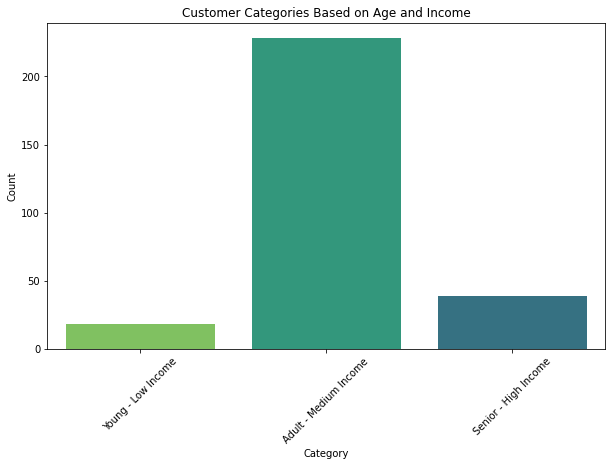

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
data = sns.load_dataset('titanic')

# Display the first few rows of the dataset
# This dataset includes passenger details like age, fare (income proxy), etc.
print(data.head())

# Handling missing values for simplicity
# Filling missing ages with the median value
data['age'] = data['age'].fillna(data['age'].median())

# Creating a new column for income levels based on the fare
# Using quantiles to define low, medium, and high income
data['income_level'] = pd.qcut(data['fare'], q=3, labels=['Low', 'Medium', 'High'])

# Defining conditions for categorization
conditions = [
    (data['age'] < 18) & (data['income_level'] == 'Low'),
    (data['age'].between(18, 50)) & (data['income_level'] == 'Medium'),
    (data['age'] > 50) & (data['income_level'] == 'High')
]

# Corresponding categories
categories = ['Young - Low Income', 'Adult - Medium Income', 'Senior - High Income']

# Applying np.select to create a new column
data['category'] = np.select(conditions, categories, default='Other')

# Print the first few rows to verify the new column
print(data[['age', 'fare', 'income_level', 'category']].head())

# Visualizing the categories using a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='category', order=categories, palette='viridis', hue='category', legend=False)
plt.title('Customer Categories Based on Age and Income')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

